In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns

In [2]:
print(tf.__version__)

2.5.0


In [3]:
data=pd.read_csv(r"C:\Users\User\Downloads\rainfall in india 1901-2015.csv")
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [4]:
groups = data.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
am=groups.get_group(('ASSAM & MEGHALAYA'))
am.head()

C:\Users\User\anaconda3\envs\DeepLearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
207,1901,27.1,19.5,30.6,223.0,207.0,524.9,430.6,464.1,291.4,163.7,115.6,1.2
208,1902,9.3,10.2,105.6,350.0,262.1,620.7,510.8,536.0,441.3,97.0,7.8,1.3
209,1903,19.9,25.4,103.6,140.6,206.6,607.4,362.7,551.9,306.4,159.5,59.3,1.3
210,1904,11.1,56.1,51.9,457.1,375.2,385.7,477.6,438.8,245.9,115.9,46.4,2.5
211,1905,19.9,16.9,137.9,213.0,275.5,521.7,439.1,649.1,276.0,200.0,16.8,24.8


In [5]:
am=am.melt(['YEAR']).reset_index()
am.head()

,index,YEAR,variable,value
0,0,1901,JAN,27.1
1,1,1902,JAN,9.3
2,2,1903,JAN,19.9
3,3,1904,JAN,11.1
4,4,1905,JAN,19.9


In [6]:
dfam= am[['YEAR','variable','value']].sort_values(by=['YEAR'])
dfam.head()

,YEAR,variable,value
0,1901,JAN,27.1
575,1901,JUN,524.9
345,1901,APR,223.0
690,1901,JUL,430.6
805,1901,AUG,464.1


In [7]:
dfam.columns=['YEAR','Month','avg_rainfall']
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
dfam['Month']=dfam['Month'].map(d)
dfam.head(12)

,YEAR,Month,avg_rainfall
0,1901,1,27.1
575,1901,6,524.9
345,1901,4,223.0
690,1901,7,430.6
805,1901,8,464.1
230,1901,3,30.6
1265,1901,12,1.2
920,1901,9,291.4
115,1901,2,19.5
1035,1901,10,163.7


In [8]:
dfam['Date']=pd.to_datetime(dfam.assign(Day=1).loc[:,['YEAR','Month','Day']])
dfam.sort_values(by=['Date'], inplace=True, ascending=True)
dfam.head(12)

,YEAR,Month,avg_rainfall,Date
0,1901,1,27.1,1901-01-01
115,1901,2,19.5,1901-02-01
230,1901,3,30.6,1901-03-01
345,1901,4,223.0,1901-04-01
460,1901,5,207.0,1901-05-01
575,1901,6,524.9,1901-06-01
690,1901,7,430.6,1901-07-01
805,1901,8,464.1,1901-08-01
920,1901,9,291.4,1901-09-01
1035,1901,10,163.7,1901-10-01


In [9]:
#Outlier detection
up_b = dfam['avg_rainfall'].mean() + 2*dfam['avg_rainfall'].std()
low_b = dfam['avg_rainfall'].mean() - 2*dfam['avg_rainfall'].std()
# Replace outlier by interpolation 
dfam.loc[dfam['avg_rainfall'] > up_b, 'avg_rainfall'] = np.nan
dfam.loc[dfam['avg_rainfall'] < low_b, 'avg_rainfall'] = np.nan
dfam['avg_rainfall'].interpolate(inplace=True)

In [61]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Rainfall(in cm)")
    plt.grid(True)

In [11]:
series = np.asarray(dfam.avg_rainfall)
time = np.asarray(dfam.Date)
print(time,series)
print(len(time),len(series))

['1901-01-01T00:00:00.000000000' '1901-02-01T00:00:00.000000000'
 '1901-03-01T00:00:00.000000000' ... '2015-10-01T00:00:00.000000000'
 '2015-11-01T00:00:00.000000000' '2015-12-01T00:00:00.000000000'] [27.1 19.5 30.6 ... 62.6 14.  15.2]
1380 1380


In [12]:
#dfam = dfam.drop(['YEAR','Month'],1)
dfam.set_index(dfam['Date'],inplace=True)
dfam = dfam.drop(['Date'],1)
dfam

,YEAR,Month,avg_rainfall
Date,,,
1901-01-01,1901,1,27.1
1901-02-01,1901,2,19.5
1901-03-01,1901,3,30.6
1901-04-01,1901,4,223.0
1901-05-01,1901,5,207.0
...,...,...,...
2015-08-01,2015,8,590.9
2015-09-01,2015,9,279.9
2015-10-01,2015,10,62.6


In [13]:
dfam = dfam.drop(['YEAR','Month'],1)
dfam

,avg_rainfall
Date,
1901-01-01,27.1
1901-02-01,19.5
1901-03-01,30.6
1901-04-01,223.0
1901-05-01,207.0
...,...
2015-08-01,590.9
2015-09-01,279.9
2015-10-01,62.6


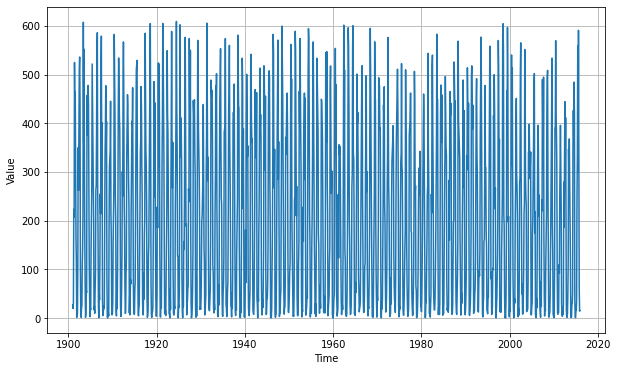

In [14]:
plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dfam)
df = scaler.transform(dfam)
series = scaler.transform(series.reshape(-1, 1))

In [31]:
split_time = 1308
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [32]:
print(time_train,x_valid.shape,series.shape)

['1901-01-01T00:00:00.000000000' '1901-02-01T00:00:00.000000000'
 '1901-03-01T00:00:00.000000000' ... '2009-10-01T00:00:00.000000000'
 '2009-11-01T00:00:00.000000000' '2009-12-01T00:00:00.000000000'] (72, 1) (1380, 1)


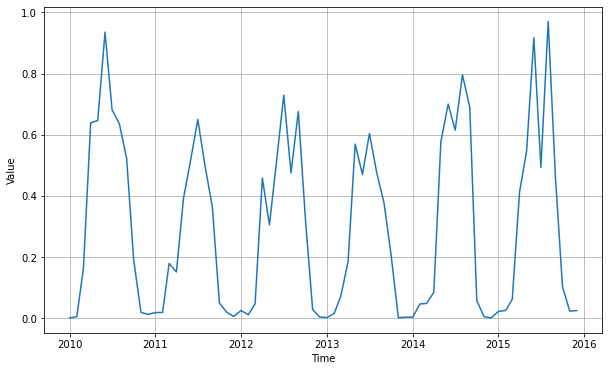

In [33]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)

In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [20]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(64).prefetch(1)
    forecast = model.predict(ds)
    return scaler.inverse_transform(forecast.reshape(-1,1))

In [21]:
shuffle_buffer_size = 1000
window_size =60
batch_size = 64

In [22]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=64, shuffle_buffer=1000)

In [23]:
valid_set = windowed_dataset(x_valid, window_size=60, batch_size=64, shuffle_buffer=1000)

In [27]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [34]:
# tf.keras.backend.clear_session()
# tf.random.set_seed(42)
# np.random.seed(42)

# shuffle_buffer_size = 1000
# window_size =60
# batch_size = 64

# train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

# loss = tf.keras.losses.Huber()

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv1D(filters=32, kernel_size=5,
#                           strides=1, padding='causal',
#                           activation='relu',
#                           input_shape=[None, 1]),
#     tf.keras.layers.LSTM(128, return_sequences=True),
#     tf.keras.layers.LSTM(64, return_sequences=True),
#     tf.keras.layers.Dense(32, activation="tanh"),
#     tf.keras.layers.Dense(16, activation="tanh"),
#     tf.keras.layers.Dense(1)
# ])


# model.compile(loss=loss, optimizer='adam', metrics=tf.keras.metrics.RootMeanSquaredError())

# history = model.fit(train_set, epochs=1000)

Epoch 1/1000
20/20 [==============================] - 4s 14ms/step - loss: 0.0522 - root_mean_squared_error: 0.3232
Epoch 2/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0209 - root_mean_squared_error: 0.2044
Epoch 3/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0128 - root_mean_squared_error: 0.1602
Epoch 4/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0115 - root_mean_squared_error: 0.1517
Epoch 5/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0107 - root_mean_squared_error: 0.1463
Epoch 6/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0101 - root_mean_squared_error: 0.1420
Epoch 7/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0096 - root_mean_squared_error: 0.1384
Epoch 8/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0092 - root_mean_squared_error: 0.1353
Epoch 9/1000
20/20 [==============================] - 0s 11ms/step - los

20/20 [==============================] - 0s 10ms/step - loss: 0.0066 - root_mean_squared_error: 0.1152
Epoch 72/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0066 - root_mean_squared_error: 0.1152
Epoch 73/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0067 - root_mean_squared_error: 0.1155
Epoch 74/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0066 - root_mean_squared_error: 0.1152
Epoch 75/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0066 - root_mean_squared_error: 0.1151
Epoch 76/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0066 - root_mean_squared_error: 0.1149
Epoch 77/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0066 - root_mean_squared_error: 0.1151
Epoch 78/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0066 - root_mean_squared_error: 0.1153
Epoch 79/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.

20/20 [==============================] - 0s 12ms/step - loss: 0.0061 - root_mean_squared_error: 0.1103
Epoch 141/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0061 - root_mean_squared_error: 0.1108
Epoch 142/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0060 - root_mean_squared_error: 0.1099
Epoch 143/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0061 - root_mean_squared_error: 0.1103
Epoch 144/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0062 - root_mean_squared_error: 0.1117
Epoch 145/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0061 - root_mean_squared_error: 0.1104
Epoch 146/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0060 - root_mean_squared_error: 0.1097
Epoch 147/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0060 - root_mean_squared_error: 0.1095
Epoch 148/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 0.0036 - root_mean_squared_error: 0.0848
Epoch 210/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0035 - root_mean_squared_error: 0.0838
Epoch 211/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0035 - root_mean_squared_error: 0.0838
Epoch 212/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0035 - root_mean_squared_error: 0.0835
Epoch 213/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0035 - root_mean_squared_error: 0.0840
Epoch 214/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0035 - root_mean_squared_error: 0.0837
Epoch 215/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0034 - root_mean_squared_error: 0.0825
Epoch 216/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0033 - root_mean_squared_error: 0.0816
Epoch 217/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0679
Epoch 279/1000
20/20 [==============================] - 0s 10ms/step - loss: 0.0023 - root_mean_squared_error: 0.0682
Epoch 280/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0680
Epoch 281/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0675
Epoch 282/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0677
Epoch 283/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0674
Epoch 284/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0677
Epoch 285/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0023 - root_mean_squared_error: 0.0672
Epoch 286/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 0.0019 - root_mean_squared_error: 0.0622
Epoch 348/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0019 - root_mean_squared_error: 0.0623
Epoch 349/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0020 - root_mean_squared_error: 0.0628
Epoch 350/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0019 - root_mean_squared_error: 0.0621
Epoch 351/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0019 - root_mean_squared_error: 0.0622
Epoch 352/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0019 - root_mean_squared_error: 0.0621
Epoch 353/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0020 - root_mean_squared_error: 0.0626
Epoch 354/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0019 - root_mean_squared_error: 0.0619
Epoch 355/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 0.0017 - root_mean_squared_error: 0.0588
Epoch 417/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0017 - root_mean_squared_error: 0.0589
Epoch 418/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0017 - root_mean_squared_error: 0.0590
Epoch 419/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0018 - root_mean_squared_error: 0.0592
Epoch 420/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0017 - root_mean_squared_error: 0.0586
Epoch 421/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0017 - root_mean_squared_error: 0.0584
Epoch 422/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0017 - root_mean_squared_error: 0.0588
Epoch 423/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0017 - root_mean_squared_error: 0.0583
Epoch 424/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0565
Epoch 486/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0566
Epoch 487/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0563
Epoch 488/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0561
Epoch 489/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0558
Epoch 490/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0558
Epoch 491/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0560
Epoch 492/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0016 - root_mean_squared_error: 0.0559
Epoch 493/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 12ms/step - loss: 0.0014 - root_mean_squared_error: 0.0536
Epoch 555/1000
20/20 [==============================] - 0s 14ms/step - loss: 0.0014 - root_mean_squared_error: 0.0533
Epoch 556/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0014 - root_mean_squared_error: 0.0534
Epoch 557/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0014 - root_mean_squared_error: 0.0534
Epoch 558/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0014 - root_mean_squared_error: 0.0536
Epoch 559/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0014 - root_mean_squared_error: 0.0534
Epoch 560/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0014 - root_mean_squared_error: 0.0533
Epoch 561/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0014 - root_mean_squared_error: 0.0532
Epoch 562/1000
20/20 [==============================] - 0s 12ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 0.0013 - root_mean_squared_error: 0.0513
Epoch 624/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0013 - root_mean_squared_error: 0.0514
Epoch 625/1000
20/20 [==============================] - 0s 13ms/step - loss: 0.0013 - root_mean_squared_error: 0.0513
Epoch 626/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0013 - root_mean_squared_error: 0.0514
Epoch 627/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0013 - root_mean_squared_error: 0.0508
Epoch 628/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0013 - root_mean_squared_error: 0.0507
Epoch 629/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0013 - root_mean_squared_error: 0.0513
Epoch 630/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0013 - root_mean_squared_error: 0.0515
Epoch 631/1000
20/20 [==============================] - 0s 12ms/step - 

20/20 [==============================] - 0s 12ms/step - loss: 0.0012 - root_mean_squared_error: 0.0492
Epoch 693/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0489
Epoch 694/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0492
Epoch 695/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0492
Epoch 696/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0493
Epoch 697/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0489
Epoch 698/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0490
Epoch 699/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0012 - root_mean_squared_error: 0.0492
Epoch 700/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 0.0011 - root_mean_squared_error: 0.0475
Epoch 762/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0011 - root_mean_squared_error: 0.0475
Epoch 763/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0011 - root_mean_squared_error: 0.0472
Epoch 764/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0011 - root_mean_squared_error: 0.0468
Epoch 765/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0011 - root_mean_squared_error: 0.0471
Epoch 766/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0011 - root_mean_squared_error: 0.0470
Epoch 767/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0011 - root_mean_squared_error: 0.0471
Epoch 768/1000
20/20 [==============================] - 0s 12ms/step - loss: 0.0011 - root_mean_squared_error: 0.0469
Epoch 769/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 12ms/step - loss: 0.0010 - root_mean_squared_error: 0.0455
Epoch 831/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0458
Epoch 832/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0457
Epoch 833/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0455
Epoch 834/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0457
Epoch 835/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0453
Epoch 836/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0454
Epoch 837/1000
20/20 [==============================] - 0s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0456
Epoch 838/1000
20/20 [==============================] - 0s 11ms/step - 

20/20 [==============================] - 0s 11ms/step - loss: 9.7226e-04 - root_mean_squared_error: 0.0441
Epoch 899/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.7054e-04 - root_mean_squared_error: 0.0441
Epoch 900/1000
20/20 [==============================] - 0s 11ms/step - loss: 9.8268e-04 - root_mean_squared_error: 0.0443
Epoch 901/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.8118e-04 - root_mean_squared_error: 0.0443
Epoch 902/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.7573e-04 - root_mean_squared_error: 0.0442
Epoch 903/1000
20/20 [==============================] - 0s 11ms/step - loss: 9.5653e-04 - root_mean_squared_error: 0.0437
Epoch 904/1000
20/20 [==============================] - 0s 13ms/step - loss: 9.5782e-04 - root_mean_squared_error: 0.0438
Epoch 905/1000
20/20 [==============================] - 0s 14ms/step - loss: 9.6689e-04 - root_mean_squared_error: 0.0440
Epoch 906/1000
20/20 [=================

20/20 [==============================] - 0s 11ms/step - loss: 9.2441e-04 - root_mean_squared_error: 0.0430
Epoch 966/1000
20/20 [==============================] - 0s 11ms/step - loss: 9.1435e-04 - root_mean_squared_error: 0.0428
Epoch 967/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.1122e-04 - root_mean_squared_error: 0.0427
Epoch 968/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.0699e-04 - root_mean_squared_error: 0.0426
Epoch 969/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.0789e-04 - root_mean_squared_error: 0.0426
Epoch 970/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.0599e-04 - root_mean_squared_error: 0.0426
Epoch 971/1000
20/20 [==============================] - 0s 12ms/step - loss: 8.9657e-04 - root_mean_squared_error: 0.0423
Epoch 972/1000
20/20 [==============================] - 0s 12ms/step - loss: 9.0722e-04 - root_mean_squared_error: 0.0426
Epoch 973/1000
20/20 [=================

In [58]:
# model = tf.keras.models.load_model(r'C:\Users\User\Desktop\Projects')


KeyboardInterrupt: 

In [26]:
# history = model.fit(train_set, epochs=100)

Epoch 1/100
20/20 [==============================] - 22s 18ms/step - loss: 207.3404 - mae: 207.8361
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 205.9888 - mae: 206.4844
Epoch 3/100
20/20 [==============================] - 0s 12ms/step - loss: 205.3675 - mae: 205.8638
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 204.9635 - mae: 205.4601
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 204.6096 - mae: 205.1058
Epoch 6/100
20/20 [==============================] - 0s 11ms/step - loss: 204.2769 - mae: 204.7732
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 203.9572 - mae: 204.4539
Epoch 8/100
20/20 [==============================] - 0s 11ms/step - loss: 203.6478 - mae: 204.1440
Epoch 9/100
20/20 [==============================] - 0s 11ms/step - loss: 203.3464 - mae: 203.8422
Epoch 10/100
20/20 [==============================] - 0s 11ms/step - loss: 203.0518 - mae: 203.5476
Epoch 11

20/20 [==============================] - 0s 13ms/step - loss: 185.0273 - mae: 185.5018
Epoch 84/100
20/20 [==============================] - 0s 13ms/step - loss: 184.7773 - mae: 185.2541
Epoch 85/100
20/20 [==============================] - 0s 13ms/step - loss: 184.4891 - mae: 184.9611
Epoch 86/100
20/20 [==============================] - 0s 14ms/step - loss: 184.2378 - mae: 184.7086
Epoch 87/100
20/20 [==============================] - 0s 13ms/step - loss: 183.9699 - mae: 184.4376
Epoch 88/100
20/20 [==============================] - 0s 14ms/step - loss: 183.7038 - mae: 184.1670
Epoch 89/100
20/20 [==============================] - 0s 13ms/step - loss: 183.4492 - mae: 183.9119
Epoch 90/100
20/20 [==============================] - 0s 13ms/step - loss: 183.2014 - mae: 183.6607
Epoch 91/100
20/20 [==============================] - 0s 13ms/step - loss: 182.9736 - mae: 183.4346
Epoch 92/100
20/20 [==============================] - 0s 12ms/step - loss: 182.7875 - mae: 183.2597
Epoch 93/100


First 12 Predictions : 
 [ 21.592089   14.010531   60.34374   176.61955   316.54852   445.811
 534.9881    515.6088    228.68735   131.14317    -4.690623   -2.2582839]

mae :  203.5535


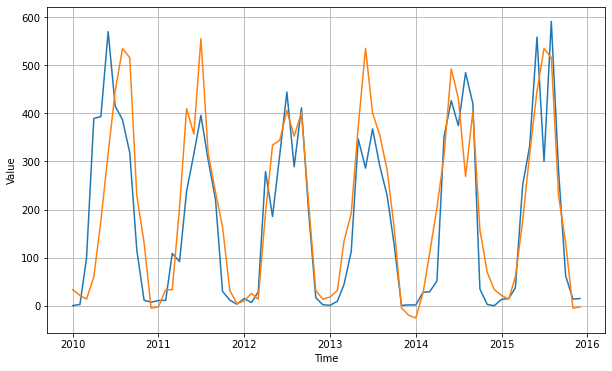

In [59]:
ser = series[:, np.newaxis]
rnn_forecast = model_forecast(model, ser , window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, 0]
print("mae : ", tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast[-72:]).numpy().mean())

In [27]:
model.save(r'C:\Users\User\Desktop\Projects')

In [56]:
dates = [dfam.index[-1] + pd.tseries.offsets.DateOffset(months=x) for x in range(1,181) ]

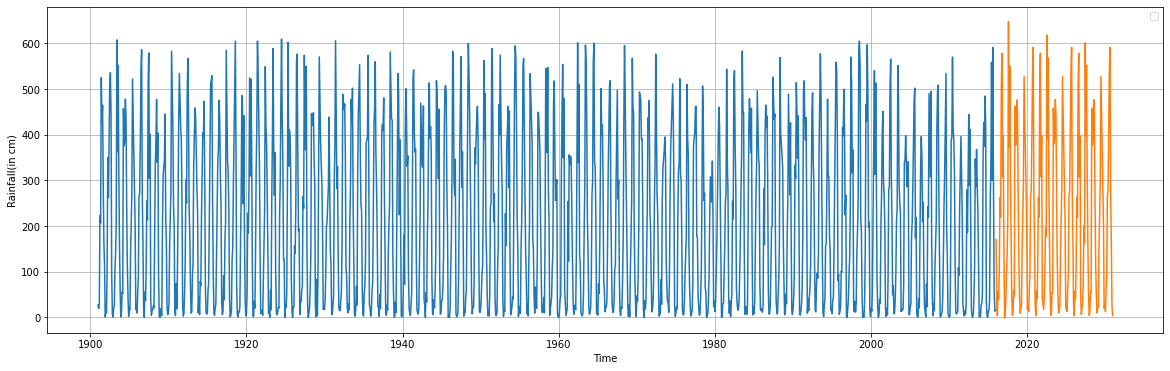

In [66]:
plt.figure(figsize=(20, 6))
plt.legend(['Actual','Predicted'])
plot_series(time, scaler.inverse_transform(series.reshape(-1,1)))
plot_series(dates, rnn_forecast[:180])
plt.show()